In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import pickle
import itertools
import matplotlib as mpl
from keras.preprocessing.image import load_img, img_to_array


sns.set()

mpl.rcParams.update({
    'font.size'           : 18.0,
    'axes.titlesize'      : 'large',
    'axes.labelsize'      : 'medium',
    'xtick.labelsize'     : 'medium',
    'ytick.labelsize'     : 'medium',
    'legend.fontsize'     : 'medium',
})

Using TensorFlow backend.


In [2]:
with open('../models/metrics/model_2700_cm.txt', 'rb') as f:
    cm_my_model = pickle.load(f)
with open('../models/metrics/xception_cm.txt', 'rb') as f:
    cm_xception = pickle.load(f)
with open('../pickles/class_names.p', 'rb') as f:
    class_names = pickle.load(f)

In [3]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    """
    This function prints and plots the confusion matrix.
    """
    
    fig, ax = plt.subplots(1,1,figsize = (10,10))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    print(len(classes))
    ax.set_title(title)
    plt.colorbar(ax=ax)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

149


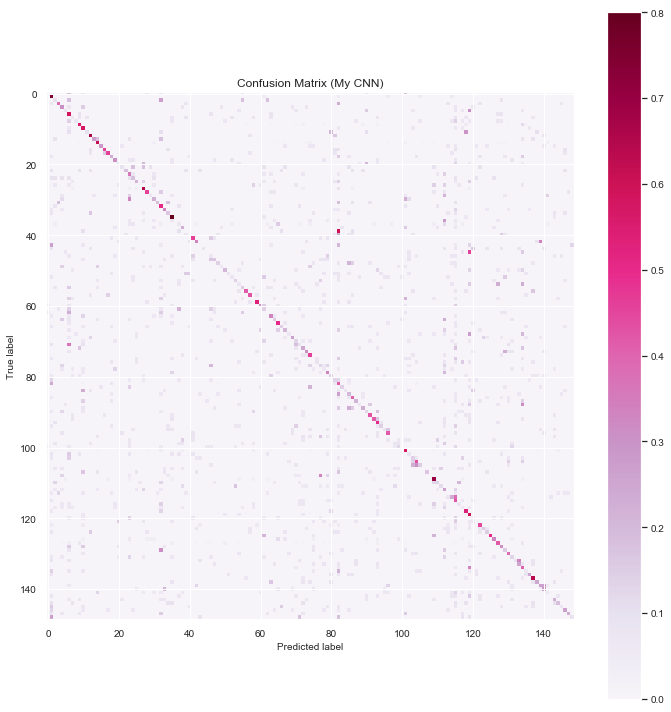

In [33]:
sze = 149
plot_confusion_matrix(cm_my_model[:sze,:sze], class_names[:sze], title="Confusion Matrix (My CNN)", cmap=plt.cm.PuRd)
plt.tight_layout()
#plt.savefig("../img/my_cnn_cm.png", dpi=200)

In [5]:
from heapq import nlargest
from collections import defaultdict

d = defaultdict(list)

for i in range(len(cm_my_model)):
    for j in range(i):
      d[cm_my_model[i][j]].append((i, j))

for value, positions in nlargest(5, d.items(), key=lambda item: item[0]):
    #print(value, positions)
    target = class_names[positions[0][0]]
    predicted = class_names[positions[0][1]]
    perc = value/sum(cm_my_model[positions[0][0]])
    print (target + " for " + predicted, f'{perc*100:1f}%')

Mewtwo for Aerodactyl 24.193548%
Mewtwo for Cloyster 8.064516%
Golbat for Aerodactyl 26.666667%
Eevee for Dodrio 33.333333%
Blastoise for Beedrill 14.285714%


In [6]:
class_names[82]

'Mewtwo'

In [7]:
d.keys()

dict_keys([0, 1, 2, 3, 4, 15, 5])

In [8]:
149*149

22201

In [9]:
sum(cm_my_model[82])

62

In [10]:
perc_dict = defaultdict(float)
for num in [1, 2, 3, 4, 15, 5]:
    for item in d[num]:
        target = class_names[item[0]]
        predicted = class_names[item[1]]
        percentage = num/sum(cm_my_model[item[0]])
        key_string = target + " for " + predicted
        perc_dict[key_string] = percentage

In [11]:
for value, positions in nlargest(5, perc_dict.items(), key=lambda item: item[1]):
    print(value + " {:0f}% of the time".format(perc_dict[value]*100))

Machoke for Beedrill 36.363636% of the time
Eevee for Dodrio 33.333333% of the time
Primeape for Mankey 33.333333% of the time
Vaporeon for Seadra 33.333333% of the time
Poliwrath for Poliwhirl 30.769231% of the time


In [12]:
col_names = ["loss", "acc", "val_loss", "val_acc"]
my_cnn_history = pd.read_csv("../models/model_accuracy_2367_history.txt",
                             header=None,
                             names=col_names)

In [13]:
my_cnn_history

,loss,acc,val_loss,val_acc
0,4.642904,0.079639,4.266100,0.125610
1,4.060012,0.132683,3.949358,0.138415
2,3.741482,0.165632,3.847429,0.164634
3,3.521585,0.196809,3.657512,0.188415
4,3.387521,0.221040,3.593713,0.200000
5,3.325508,0.229905,3.656838,0.195732
6,3.233458,0.244976,3.616092,0.229878
7,3.148864,0.254580,3.509113,0.244512
8,3.069985,0.275118,3.554467,0.223171
9,2.969873,0.292553,3.592299,0.240854


In [14]:
def make_acc_epoch_plot(df, epochs, title="Accuracy per Epoch"):
    x_vals = np.arange(0, epochs)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(x_vals, df.iloc[:epochs, 1], "ob-", label="Training Accuracy")
    ax.plot(x_vals, df.iloc[:epochs, 3], "og-", label="Testing Accuracy")
    ax.set_xticks(x_vals)
    ax.set_xticklabels(x_vals+1)
    ax.set_yticklabels(["5%", "10%", "15%", "20%", "25%", "30%"])
    ax.set_title(title)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.legend()

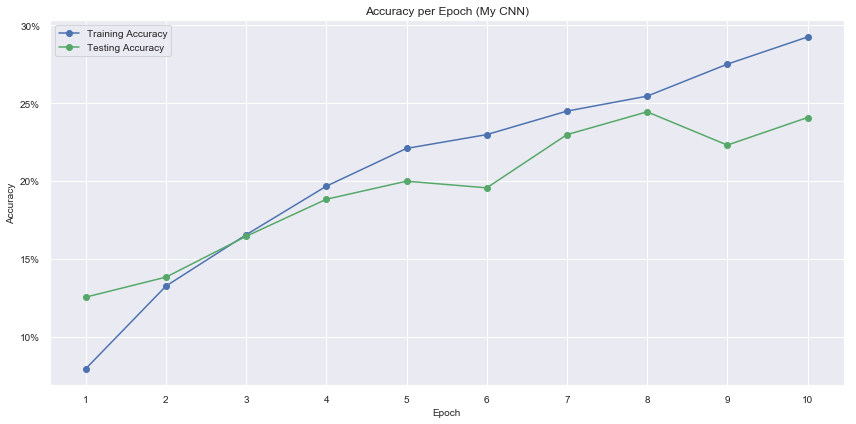

In [15]:
make_acc_epoch_plot(my_cnn_history, 10, "Accuracy per Epoch (My CNN)")
plt.tight_layout()
#plt.savefig("../img/accuracy_per_epoch_my_cnn.png", dpi=200)

In [16]:
def make_loss_epoch_plot(df, epochs, title="Accuracy per Epoch"):
    x_vals = np.arange(0, epochs)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(x_vals, df.iloc[:epochs, 0], "ob-", label="Training Loss")
    ax.plot(x_vals, df.iloc[:epochs, 2], "og-", label="Testing Loss")
    ax.set_xticks(x_vals)
    ax.set_xticklabels(x_vals+1)
    ax.set_title(title)
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend()

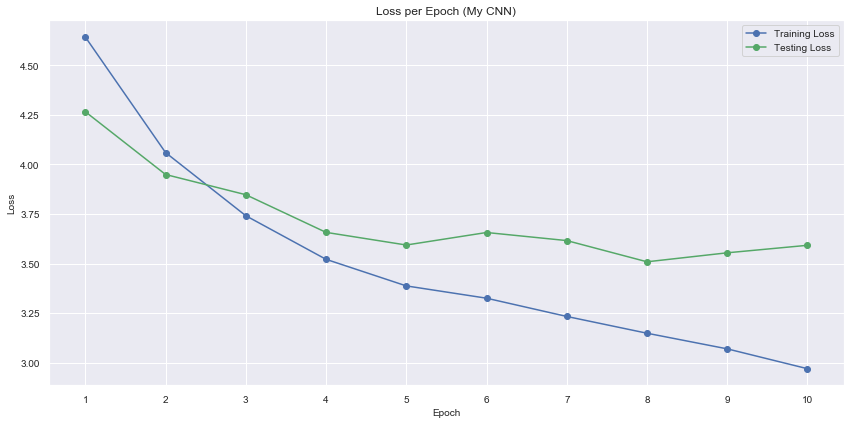

In [17]:
make_loss_epoch_plot(my_cnn_history, 10, "Loss per Epoch (My CNN)")
plt.tight_layout()
#plt.savefig("../img/loss_per_epoch_my_cnn.png", dpi=200)

Epoch 1/10
6768/6768 [==============================] - 1980s 293ms/step - loss: 1.4825 - acc: 0.6402 - val_loss: 4.4622 - val_acc: 0.3166
Epoch 2/10
6768/6768 [==============================] - 1973s 292ms/step - loss: 0.7241 - acc: 0.7998 - val_loss: 5.3454 - val_acc: 0.3114
Epoch 3/10
6768/6768 [==============================] - 1974s 292ms/step - loss: 0.5611 - acc: 0.8407 - val_loss: 5.8250 - val_acc: 0.2991
Epoch 4/10
6768/6768 [==============================] - 1975s 292ms/step - loss: 0.4803 - acc: 0.8619 - val_loss: 6.0309 - val_acc: 0.3025
Epoch 5/10
6768/6768 [==============================] - 1976s 292ms/step - loss: 0.4321 - acc: 0.8759 - val_loss: 6.2075 - val_acc: 0.3114
Epoch 6/10
6768/6768 [==============================] - 1976s 292ms/step - loss: 0.3990 - acc: 0.8859 - val_loss: 6.4548 - val_acc: 0.3053
Epoch 7/10
6768/6768 [==============================] - 1975s 292ms/step - loss: 0.3732 - acc: 0.8926 - val_loss: 6.7880 - val_acc: 0.2951
Epoch 8/10
6768/6768 [==============================] - 1975s 292ms/step - loss: 0.3626 - acc: 0.8969 - val_loss: 6.7285 - val_acc: 0.3169
Epoch 9/10
6768/6768 [==============================] - 1973s 292ms/step - loss: 0.3466 - acc: 0.9027 - val_loss: 6.7837 - val_acc: 0.2993
Epoch 10/10
6768/6768 [==============================] - 1972s 291ms/step - loss: 0.3307 - acc: 0.9075 - val_loss: 6.7788 - val_acc: 0.3145
2285/2285 [==============================] - 358s 157ms/step

In [18]:
my_cnn_history

,loss,acc,val_loss,val_acc
0,4.642904,0.079639,4.266100,0.125610
1,4.060012,0.132683,3.949358,0.138415
2,3.741482,0.165632,3.847429,0.164634
3,3.521585,0.196809,3.657512,0.188415
4,3.387521,0.221040,3.593713,0.200000
5,3.325508,0.229905,3.656838,0.195732
6,3.233458,0.244976,3.616092,0.229878
7,3.148864,0.254580,3.509113,0.244512
8,3.069985,0.275118,3.554467,0.223171
9,2.969873,0.292553,3.592299,0.240854


In [19]:
xception_acc = np.array([0.6402, 0.7998, 0.8407, 0.8619, 0.8759, 0.8859, 0.8926, 0.8969, 0.9027, 0.9075])
xception_loss = np.array([1.4825, 0.7241, 0.5611, 0.4803, 0.4321, 0.3990, 0.3732, 0.3626, 0.3466, 0.3307])
xception_val_acc = np.array([0.3166, 0.3114, 0.2991, 0.3035, 0.3114, 0.3053, 0.2951, 0.3169, 0.2993, 0.3145])
xception_val_loss = np.array([4.4622, 5.3454, 5.8250, 6.0309, 6.2075, 6.4548, 6.7880, 6.7285, 6.7837, 6.7788])

In [20]:
xception_df = np.empty(shape=(4, 10))
xception_df[0] = xception_loss
xception_df[1] = xception_acc
xception_df[2] = xception_val_loss
xception_df[3] = xception_val_acc

In [21]:
xception_df = xception_df.T

In [22]:
xception_df

array([[1.4825, 0.6402, 4.4622, 0.3166],
       [0.7241, 0.7998, 5.3454, 0.3114],
       [0.5611, 0.8407, 5.825 , 0.2991],
       [0.4803, 0.8619, 6.0309, 0.3035],
       [0.4321, 0.8759, 6.2075, 0.3114],
       [0.399 , 0.8859, 6.4548, 0.3053],
       [0.3732, 0.8926, 6.788 , 0.2951],
       [0.3626, 0.8969, 6.7285, 0.3169],
       [0.3466, 0.9027, 6.7837, 0.2993],
       [0.3307, 0.9075, 6.7788, 0.3145]])

In [23]:
def make_loss_epoch_plot(df, epochs, title="Accuracy per Epoch"):
    x_vals = np.arange(0, epochs)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(x_vals, df[:epochs, 0], "ob-", label="Training Loss")
    ax.plot(x_vals, df[:epochs, 2], "og-", label="Testing Loss")
    ax.set_xticks(x_vals)
    ax.set_xticklabels(x_vals+1)
    ax.set_title(title)
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend()

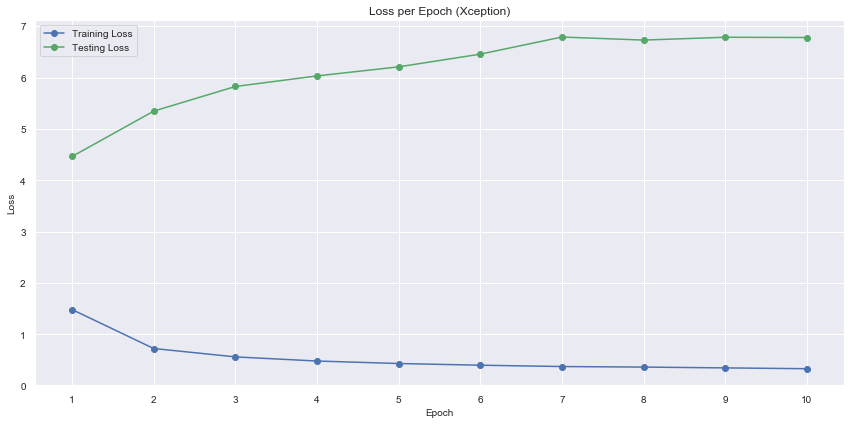

In [24]:
make_loss_epoch_plot(xception_df, 10, "Loss per Epoch (Xception)")
plt.tight_layout()
#plt.savefig("../img/loss_per_epoch_xception.png", dpi=200)

In [25]:
def make_acc_epoch_plot(df, epochs, title="Accuracy per Epoch"):
    x_vals = np.arange(0, epochs)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(x_vals, df[:epochs, 1], "ob-", label="Training Accuracy")
    ax.plot(x_vals, df[:epochs, 3], "og-", label="Testing Accuracy")
    ax.set_xticks(x_vals)
    ax.set_xticklabels(x_vals+1)
    ax.set_yticklabels(["20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])
    ax.set_title(title)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.legend()

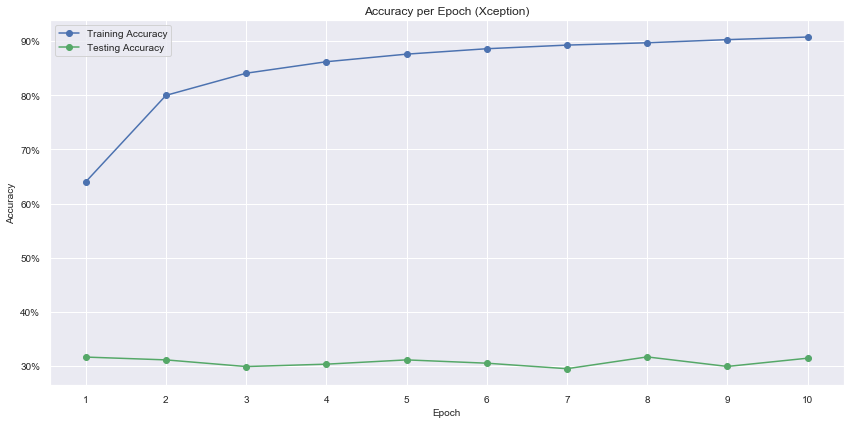

In [26]:
make_acc_epoch_plot(xception_df, 10, "Accuracy per Epoch (Xception)")
plt.tight_layout()
#plt.savefig("../img/accuracy_per_epoch_xception.png", dpi=200)

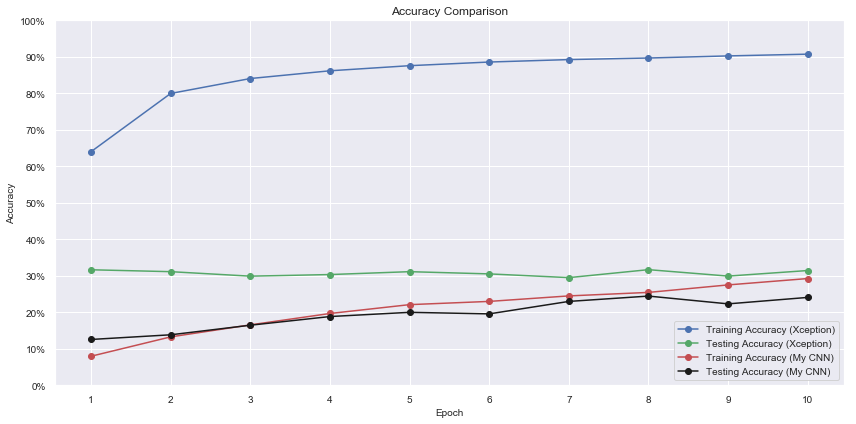

In [27]:
epochs = 10
x_vals = np.arange(0, epochs)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_vals, xception_df[:epochs, 1], "ob-", label="Training Accuracy (Xception)")
ax.plot(x_vals,xception_df[:epochs, 3], "og-", label="Testing Accuracy (Xception)")
ax.plot(x_vals, my_cnn_history.iloc[:epochs, 1], "or-", label="Training Accuracy (My CNN)")
ax.plot(x_vals, my_cnn_history.iloc[:epochs, 3], "ok-", label="Testing Accuracy (My CNN)")
ax.set_xticks(x_vals)
ax.set_xticklabels(x_vals+1)
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])
ax.set_title("Accuracy Comparison")
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend()
plt.tight_layout()
#plt.savefig("../img/accuracy_comparison.png", dpi=200)

149


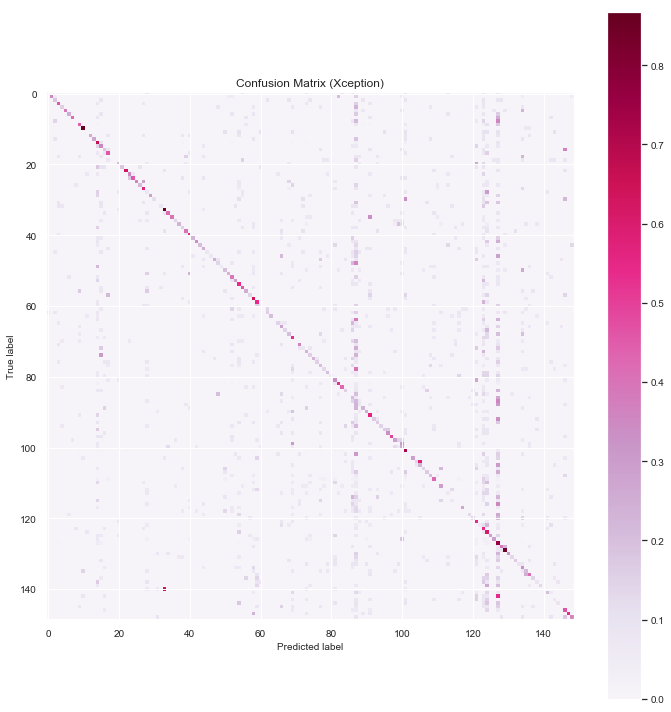

In [35]:
sze = 149
plot_confusion_matrix(cm_xception[:sze,:sze], class_names[:sze], title="Confusion Matrix (Xception)",cmap=plt.cm.PuRd)
plt.tight_layout()
#plt.savefig("../img/xception_cm.png", dpi=200)

In [29]:
d = defaultdict(list)

for i in range(len(cm_my_model)):
    for j in range(i):
      d[cm_xception[i][j]].append((i, j))

for value, positions in nlargest(5, d.items(), key=lambda item: item[0]):
    #print(value, positions)
    target = class_names[positions[0][0]]
    predicted = class_names[positions[0][1]]
    perc = value/sum(cm_my_model[positions[0][0]])
    print (target + " for " + predicted, f'{perc*100:1f}%')

Voltorb for Electrode 64.285714%
Wartortle for Squirtle 53.846154%
Mewtwo for Mew 8.064516%
Magmar for Charmeleon 30.769231%
Growlithe for Charmander 21.428571%


In [30]:
perc_dict = defaultdict(float)
for num in [1, 2, 3, 4, 15, 5]:
    for item in d[num]:
        target = class_names[item[0]]
        predicted = class_names[item[1]]
        percentage = num/sum(cm_xception[item[0]])
        key_string = target + " for " + predicted
        perc_dict[key_string] = percentage

In [31]:
for value, positions in nlargest(5, perc_dict.items(), key=lambda item: item[1]):
    print(value + " {:0f}% of the time".format(perc_dict[value]*100))

Magmar for Charmeleon 30.769231% of the time
Pidgeotto for Lickitung 30.769231% of the time
Pinsir for Nidoqueen 30.769231% of the time
Vileplume for Slowpoke 26.666667% of the time
Venonat for Venomoth 25.000000% of the time
